### DNN (Sequential and Functional Model)

#### Sequential

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load DataSet
df = pd.read_csv('FeatureExtractionParameters.csv' , delimiter=';')

print(df.head())

                     FileName Rhythm          Beat  PatientAge  Gender  \
0  MUSE_20180111_155115_19000     ST      AQW RBBB          88    MALE   
1  MUSE_20180111_155154_74000   AFIB  AQW LVHV TWC          83    MALE   
2  MUSE_20180111_155203_15000   AFIB          NONE          86    MALE   
3  MUSE_20180111_155249_70000     ST      ALS RBBB          90    MALE   
4  MUSE_20180111_155542_84000     AF          NONE          42  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              126         126          178         334          483    243   
1              110         258          102         276          373     84   
2               59         416           78         410          405     82   
3              117         117          144         354          493    -85   
4               88         352           70         362          438     87   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0     45        21     167      2

In [73]:
df.columns = df.columns.str.strip()

columns_to_drop = ['FileName', 'Beat', 'PatientAge', 'Gender']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

print(df.head)
print(df.columns)

<bound method NDFrame.head of       Rhythm  VentricularRate  AtrialRate  QRSDuration  QTInterval  \
0         ST              126         126          178         334   
1       AFIB              110         258          102         276   
2       AFIB               59         416           78         410   
3         ST              117         117          144         354   
4         AF               88         352           70         362   
...      ...              ...         ...          ...         ...   
10641    SVT              196          73          168         284   
10642    SVT              162          81          162         294   
10643    SVT              152          92          152         340   
10644    SVT              175         178          128         310   
10645    SVT              117         104          140         312   

       QTCorrected  RAxis  TAxis  QRSCount  QOnset  QOffset  TOffset  
0              483    243     45        21     167      25

In [74]:
# Merge Ryhtm Column
""" 
    AFIB: AF, AFIB
    GSVT: SVT, AT, SAAWR, ST, AVNRT, AVRT
    SR: SA, SR
    SB: Others
"""

df['MergedRhythm'] = np.where(df['Rhythm'].isin(['AF', 'AFIB']), 'AFIB',
                               np.where(df['Rhythm'].isin(['SVT', 'AT', 'SAAWR', 'ST', 'AVNRT', 'AVRT']), 'GSVT',
                                        np.where(df['Rhythm'].isin(['SA', 'SR']), 'SR', 'SB')))

print(df.head())

  Rhythm  VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  \
0     ST              126         126          178         334          483   
1   AFIB              110         258          102         276          373   
2   AFIB               59         416           78         410          405   
3     ST              117         117          144         354          493   
4     AF               88         352           70         362          438   

   RAxis  TAxis  QRSCount  QOnset  QOffset  TOffset MergedRhythm  
0    243     45        21     167      256      334         GSVT  
1     84     20        18     222      273      360         AFIB  
2     82     60        10     221      260      426         AFIB  
3    -85     81        19     210      282      387         GSVT  
4     87     22        15     225      260      406         AFIB  


In [75]:

X = df.drop(columns=['Rhythm', 'MergedRhythm'], errors='ignore').values
y = df['MergedRhythm'].values

# One-hot encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sequential DNN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')



Epoch 1/15


/Users/dogukankorkut/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4099 - loss: 1.3069 - val_accuracy: 0.6831 - val_loss: 0.7252
Epoch 2/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.6270 - loss: 0.8745 - val_accuracy: 0.7295 - val_loss: 0.6338
Epoch 3/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.6872 - loss: 0.7666 - val_accuracy: 0.7617 - val_loss: 0.5852
Epoch 4/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.7138 - loss: 0.7192 - val_accuracy: 0.7846 - val_loss: 0.5462
Epoch 5/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.7369 - loss: 0.6569 - val_accuracy: 0.7981 - val_loss: 0.5192
Epoch 6/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7612 - loss: 0.6172 - val_accuracy: 0.8058 - val_loss: 0.5004
Epoch 7/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7743 - loss: 0.5922 - val_accuracy: 0.8146 - val_loss: 0.4825
Epoch 8/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7850 - loss: 0.5834 - val_accurac

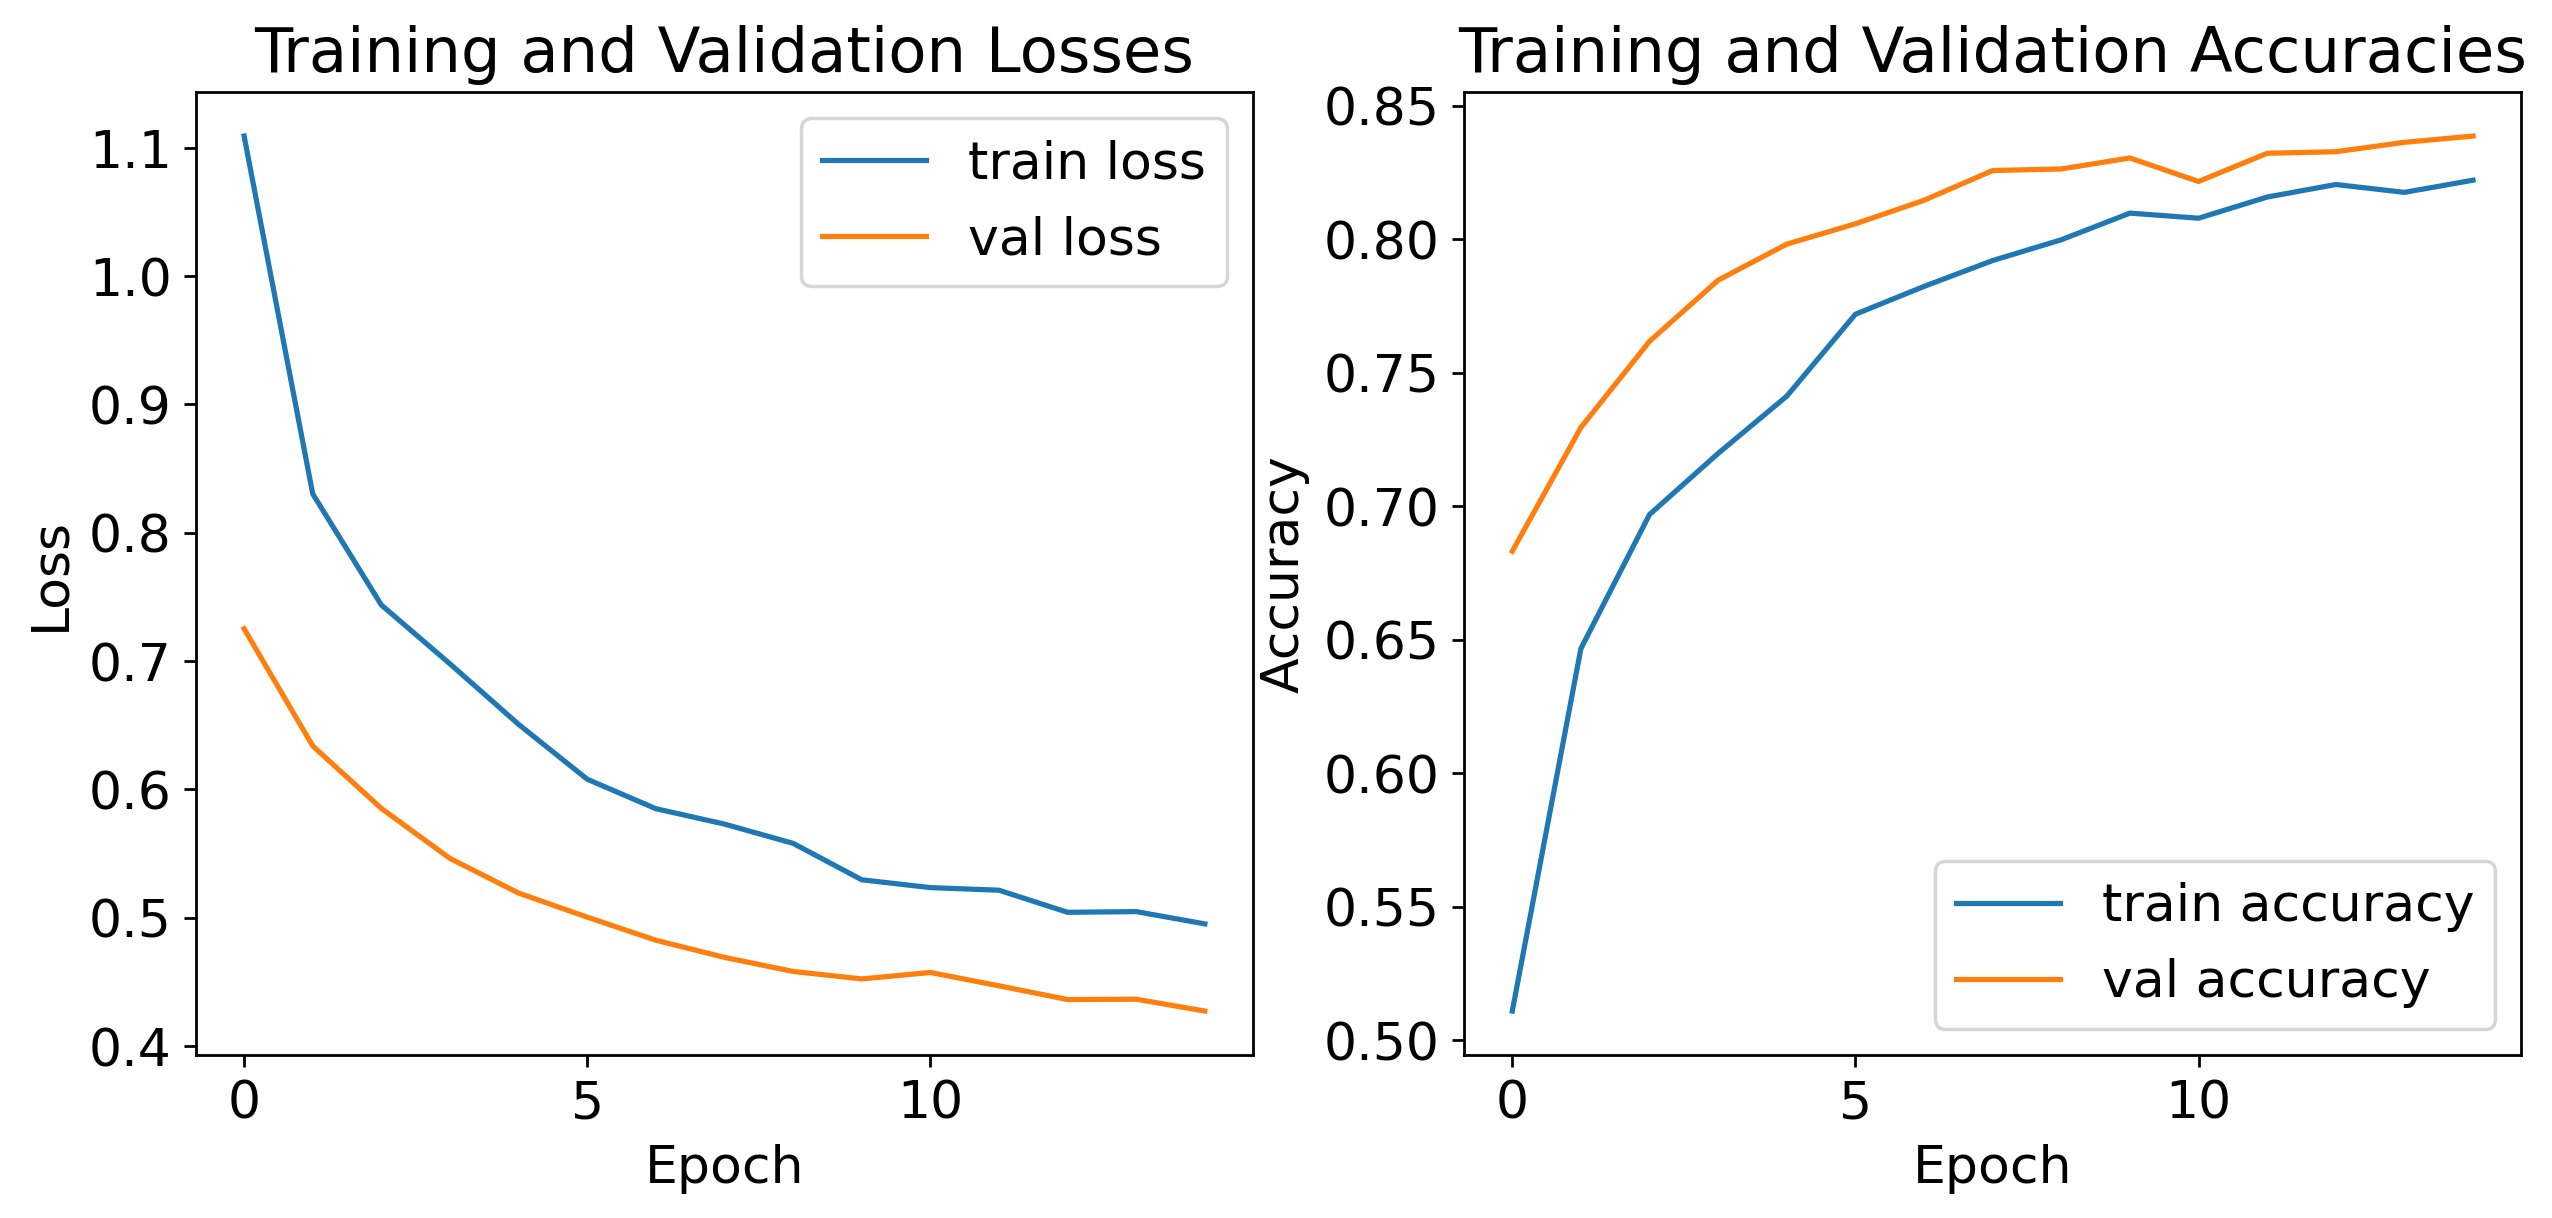

In [76]:
# Train and test Accuracy 
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12, 5),dpi=250)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
Classification Report:
              precision    recall  f1-score   support

        AFIB       0.87      0.47      0.61       422
        GSVT       0.77      0.96      0.85       479
          SB       0.97      0.99      0.98       785
          SR       0.82      0.92      0.87       444

    accuracy                           0.87      2130
   macro avg       0.86      0.84      0.83      2130
weighted avg       0.87      0.87      0.86      2130



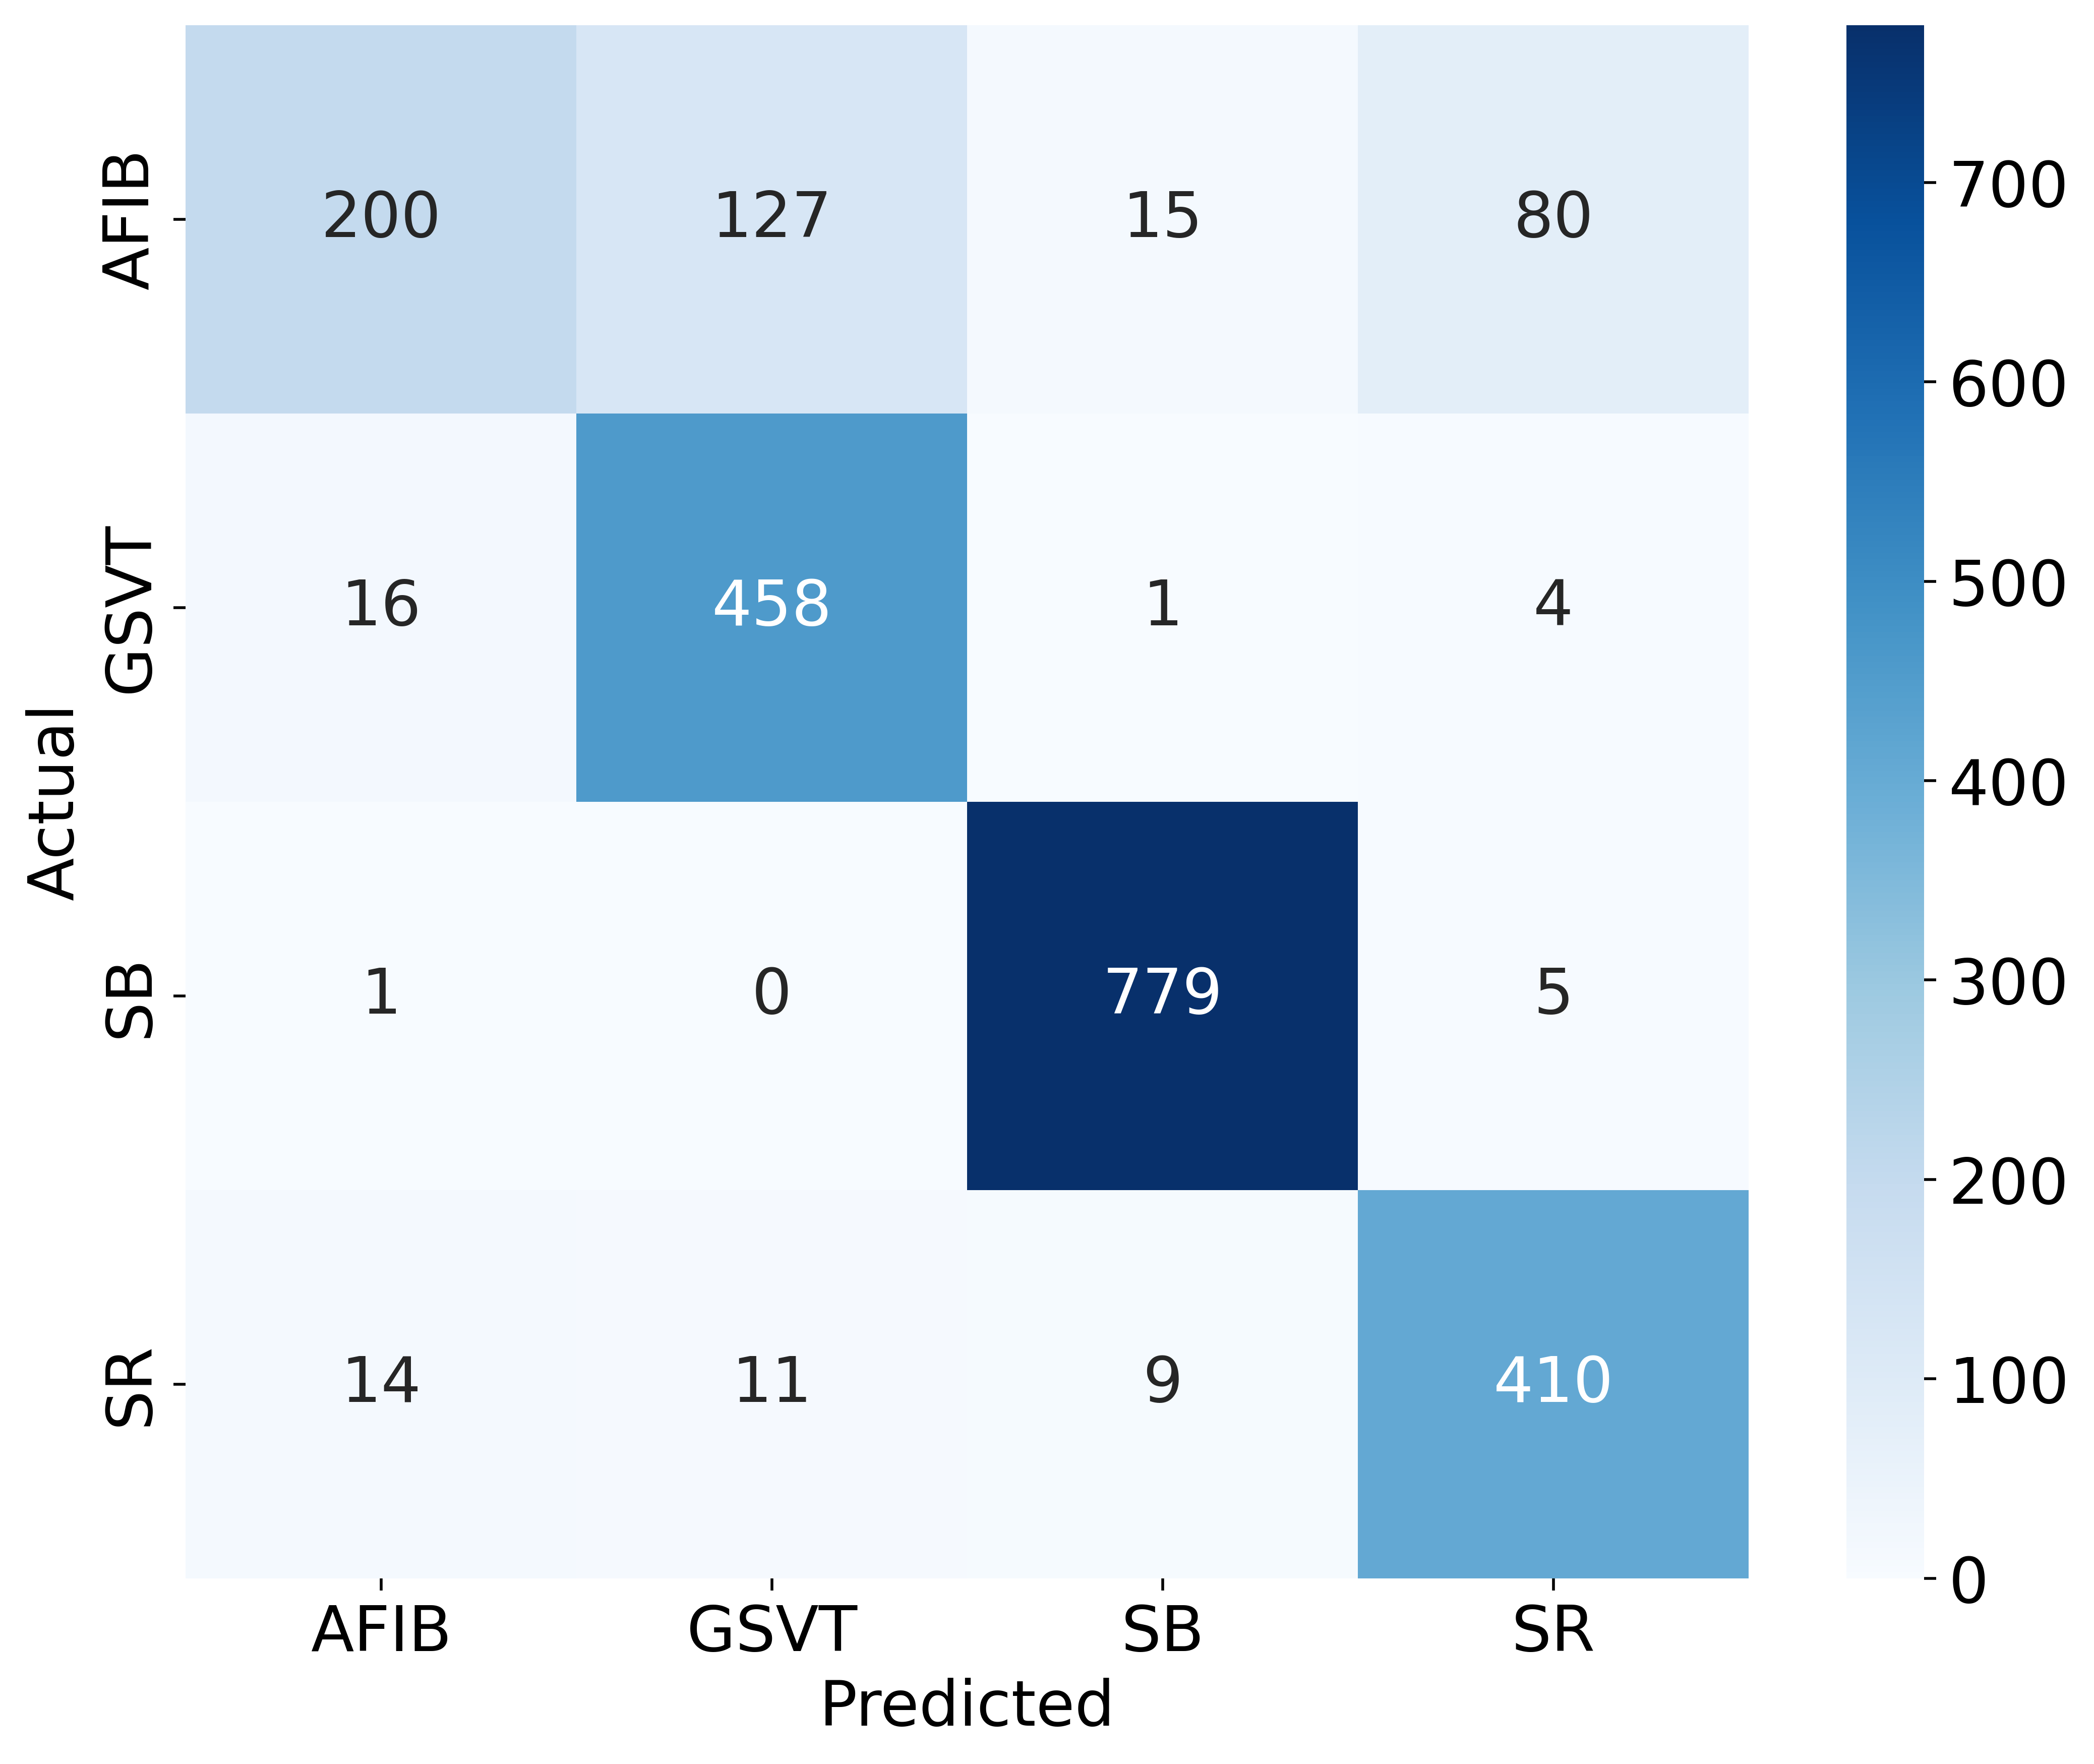

In [78]:
# Confisuon Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 8),dpi=500)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Functional Model

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical



# Load DataSet
df = pd.read_csv('Diagnostics.csv' , delimiter=';')

print(df.head())

df.columns = df.columns.str.strip()

columns_to_drop = ['FileName', 'Beat', 'PatientAge', 'Gender']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

print(df.head)
print(df.columns)

# Merge Ryhtm Column
""" 
    AFIB: AF, AFIB
    GSVT: SVT, AT, SAAWR, ST, AVNRT, AVRT
    SR: SA, SR
    SB: Others
"""

df['MergedRhythm'] = np.where(df['Rhythm'].isin(['AF', 'AFIB']), 'AFIB',
                               np.where(df['Rhythm'].isin(['SVT', 'AT', 'SAAWR', 'ST', 'AVNRT', 'AVRT']), 'GSVT',
                                        np.where(df['Rhythm'].isin(['SA', 'SR']), 'SR', 'SB')))

print(df.head())

X = df.drop(columns=['Rhythm', 'MergedRhythm'], errors='ignore').values
y = df['MergedRhythm'].values

# One-hot encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Functional DNN Model
input_layer = Input(shape=(X_train.shape[1],))
dense1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)
output_layer = Dense(y_train.shape[1], activation='softmax')(dropout2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


                     FileName Rhythm          Beat  PatientAge  Gender  \
0  MUSE_20180111_155115_19000     ST      AQW RBBB          88    MALE   
1  MUSE_20180111_155154_74000   AFIB  AQW LVHV TWC          83    MALE   
2  MUSE_20180111_155203_15000   AFIB          NONE          86    MALE   
3  MUSE_20180111_155249_70000     ST      ALS RBBB          90    MALE   
4  MUSE_20180111_155542_84000     AF          NONE          42  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              126         126          178         334          483    243   
1              110         258          102         276          373     84   
2               59         416           78         410          405     82   
3              117         117          144         354          493    -85   
4               88         352           70         362          438     87   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0     45        21     167      2

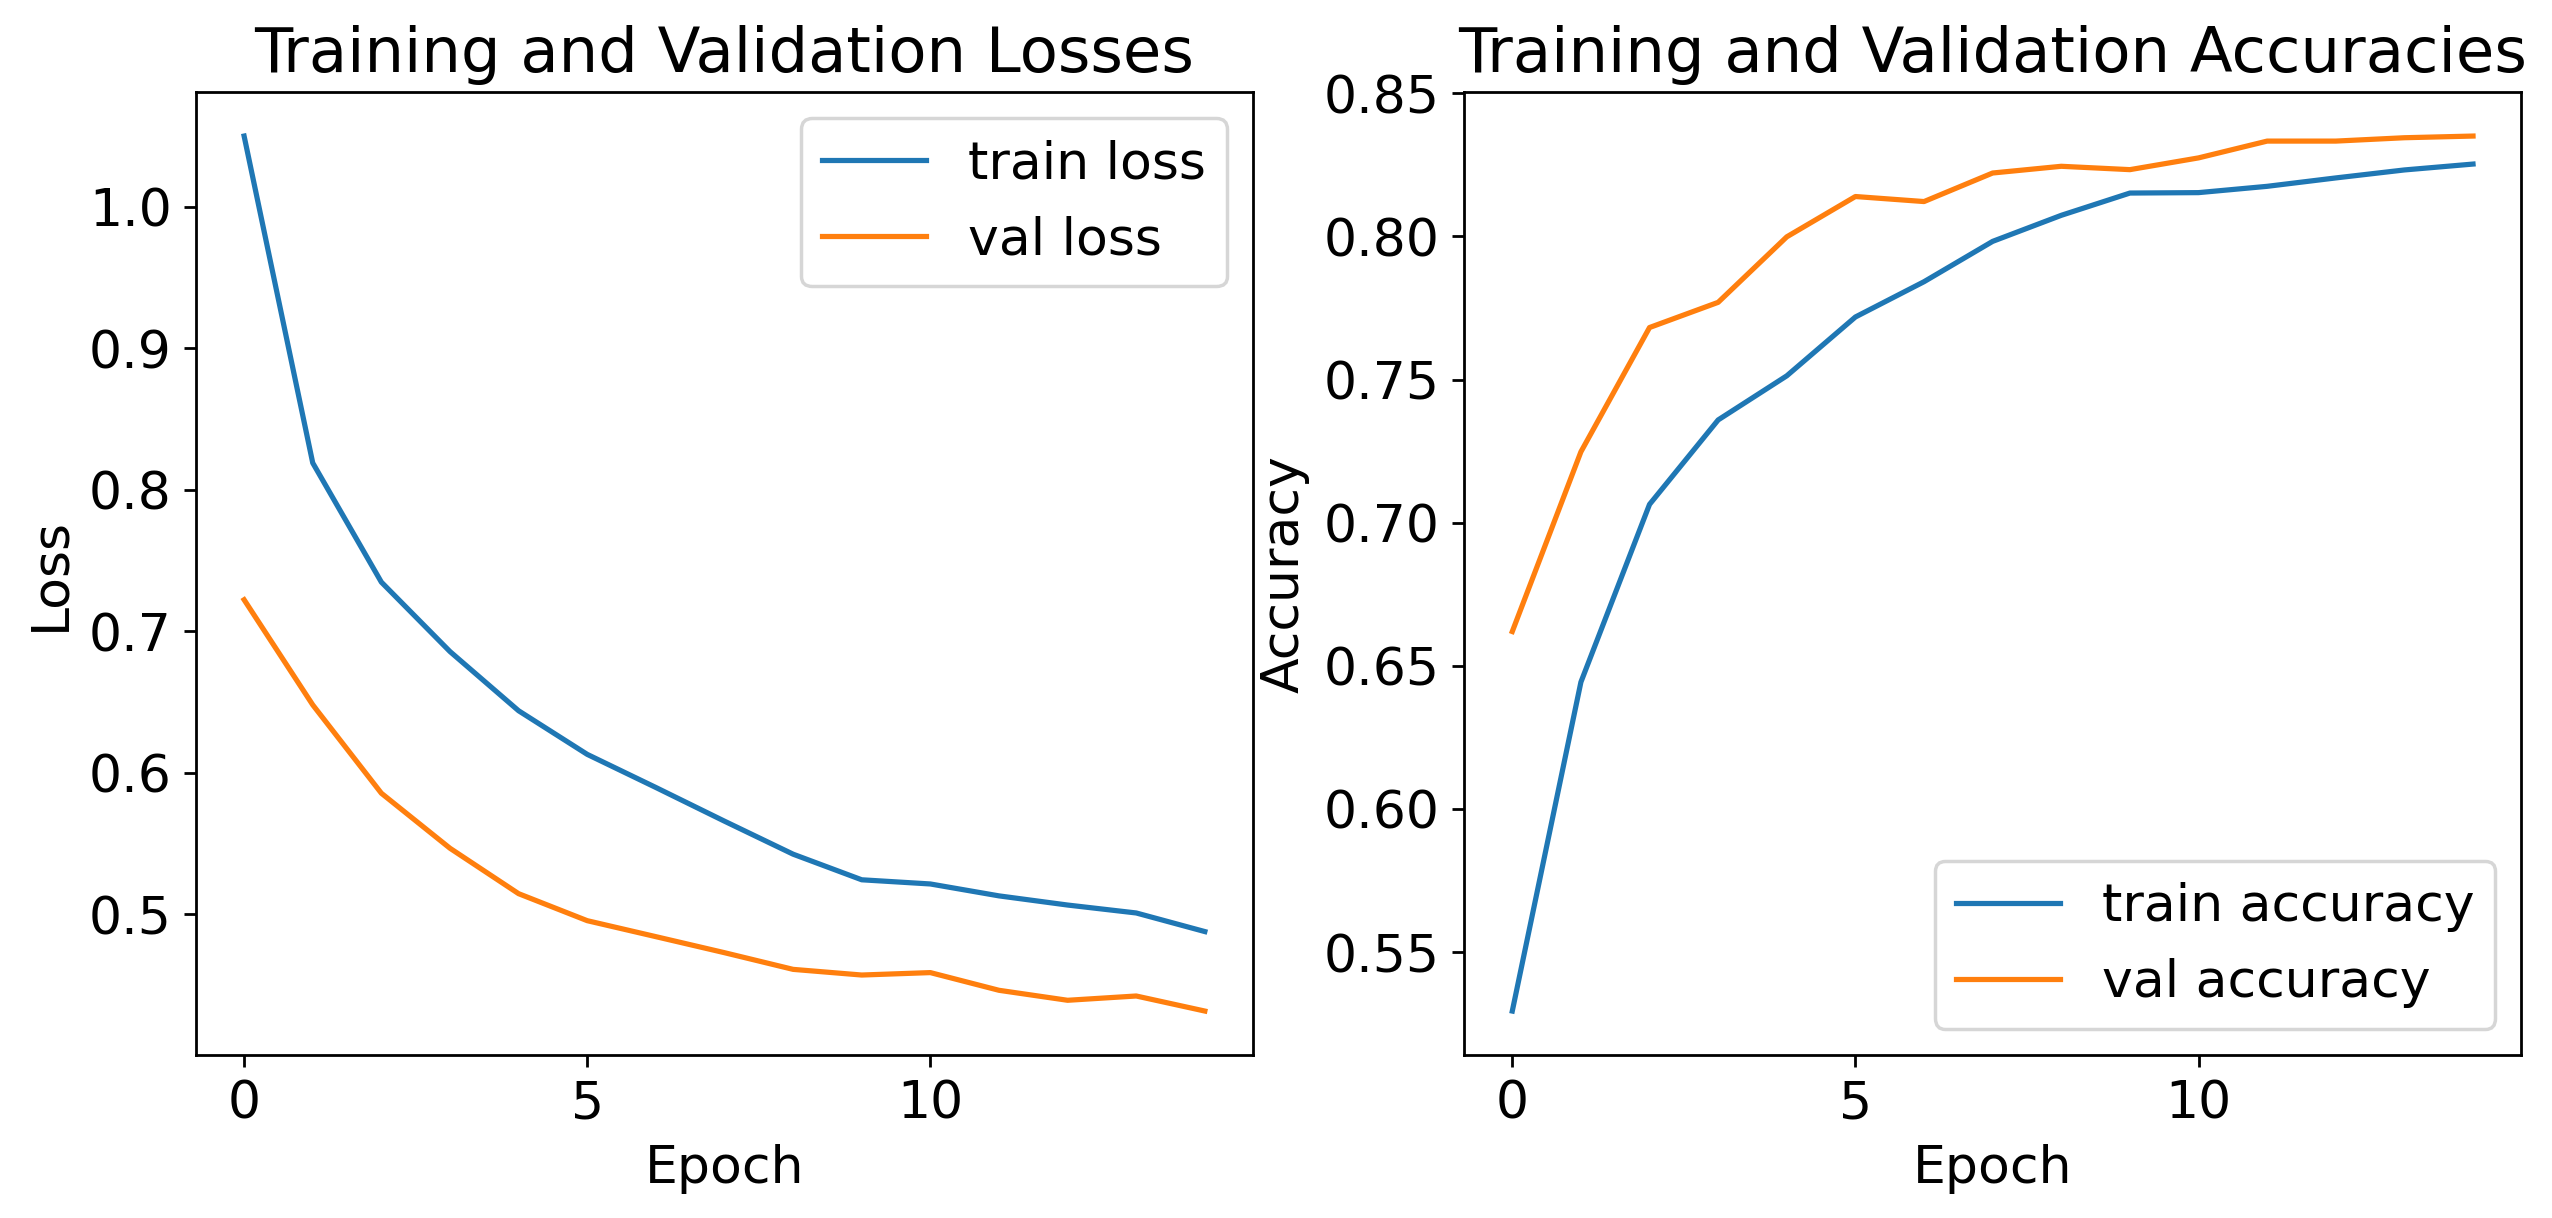

In [80]:
# Train and test Accuracy 
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12, 5),dpi=250)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [81]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
Classification Report:
              precision    recall  f1-score   support

        AFIB       0.88      0.45      0.60       422
        GSVT       0.75      0.96      0.84       479
          SB       0.97      0.99      0.98       785
          SR       0.82      0.93      0.87       444

    accuracy                           0.86      2130
   macro avg       0.86      0.83      0.82      2130
weighted avg       0.87      0.86      0.85      2130



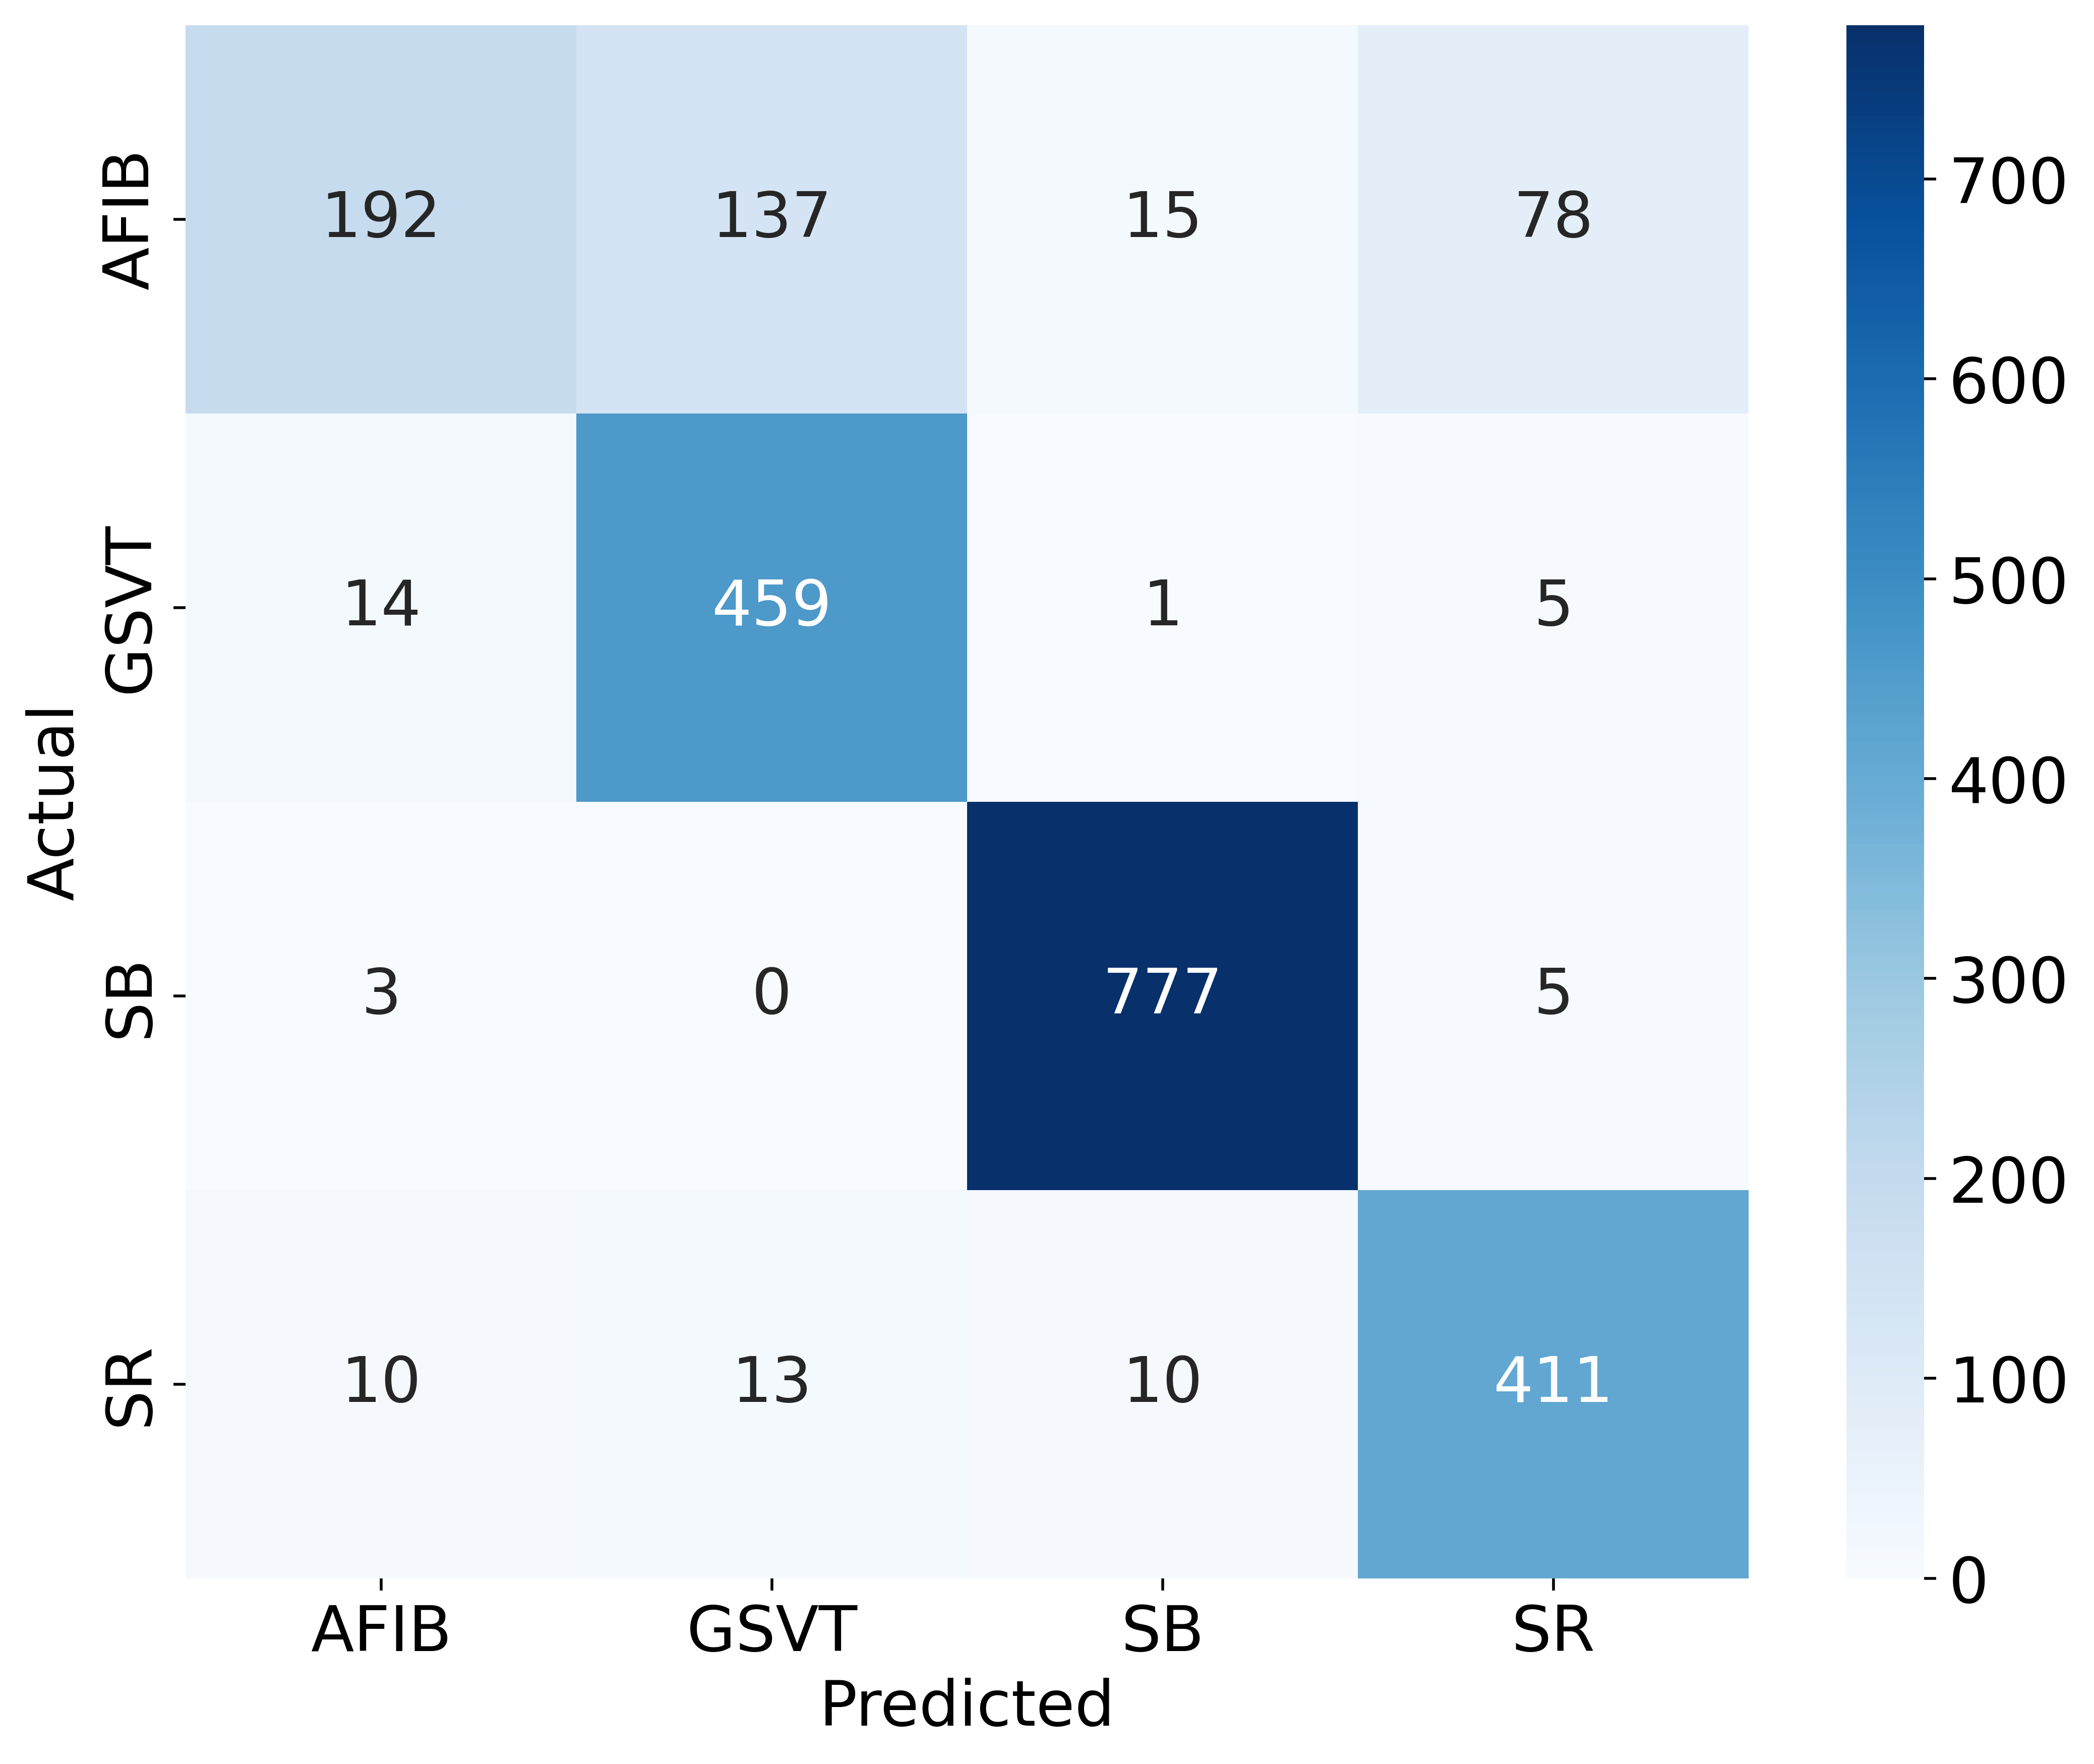

In [82]:
# Confisuon Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 8),dpi=500)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
